In [18]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [19]:
data = pd.read_excel('Data_amity_university.xlsx')  # Replace with your file path

data_2024 = pd.read_excel('Data_amity_university.xlsx', sheet_name='2024')  # Replace with your file path

# Display the data from the '2024' sheet
print(data_2024)

   Institute ID                                               Name  \
0   IR-O-U-0456              Indian Institute of Technology Madras   
1   IR-O-U-0220             Indian Institute of Science, Bengaluru   
2   IR-O-U-0306              Indian Institute of Technology Bombay   
3   IR-O-I-1074               Indian Institute of Technology Delhi   
4   IR-O-I-1075              Indian Institute of Technology Kanpur   
..          ...                                                ...   
95  IR-O-I-1486  Sri Ramachandra Institute of Higher Education ...   
96  IR-O-U-0003                       Acharya Nagarjuna University   
97  IR-O-U-0331                  Tata Institute of Social Sciences   
98  IR-O-U-0686      All India Institute of Medical Sciences Patna   
99  IR-O-U-0470                                 Periyar University   

             State  Score  Rank  TLR_Scores  RPC_Scores  GO_Scores  OI_Scores  \
0       Tamil Nadu  86.42     1       88.37       87.30      85.76      65.68 

In [20]:
tlr_data = data_2024[['Name', 'TLR_Scores']].copy()

In [22]:
print(tlr_data.columns)


Index(['Name', 'TLR_Scores'], dtype='object')


In [23]:
tlr_data.columns = tlr_data.columns.str.strip()  # Removes leading/trailing spaces
tlr_data.columns = tlr_data.columns.str.lower()  # Converts all column names to lowercase
print(tlr_data.columns)  # Verify the updated column names


Index(['name', 'tlr_scores'], dtype='object')


In [28]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the data (ensure correct sheet name if needed)
tlr_data = pd.read_excel('Data_amity_university.xlsx', sheet_name='2024')  # Replace 'SheetName'

# Check and normalize column names
tlr_data.columns = tlr_data.columns.str.strip().str.lower()  # Normalize column names
print(tlr_data.columns)  # Verify column names

# Scale the TLR Scores column
if 'tlr_scores' in tlr_data.columns:  # Check if the column exists
    scaler = StandardScaler()
    tlr_data['scaled_tlr_scores'] = scaler.fit_transform(tlr_data[['tlr_scores']])
    print(tlr_data.head())
else:
    print("Column 'tlr scores' not found in the DataFrame.")


Index(['institute id', 'name', 'state', 'score', 'rank', 'tlr_scores',
       'rpc_scores', 'go_scores', 'oi_scores', 'perception_scores'],
      dtype='object')
  institute id                                    name          state  score  \
0  IR-O-U-0456   Indian Institute of Technology Madras     Tamil Nadu  86.42   
1  IR-O-U-0220  Indian Institute of Science, Bengaluru      Karnataka  83.28   
2  IR-O-U-0306   Indian Institute of Technology Bombay    Maharashtra  81.37   
3  IR-O-I-1074    Indian Institute of Technology Delhi          Delhi  80.31   
4  IR-O-I-1075   Indian Institute of Technology Kanpur  Uttar Pradesh  77.56   

   rank  tlr_scores  rpc_scores  go_scores  oi_scores  perception_scores  \
0     1       88.37       87.30      85.76      65.68             100.00   
1     2       83.60       86.50      82.17      58.46              99.70   
2     3       83.85       82.35      83.36      59.05              89.32   
3     4       76.57       86.23      77.48      66.23

In [31]:
kmeans = KMeans(n_clusters=4, random_state=42)
tlr_data['Cluster'] = kmeans.fit_predict(tlr_data[['scaled_tlr_scores']])

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


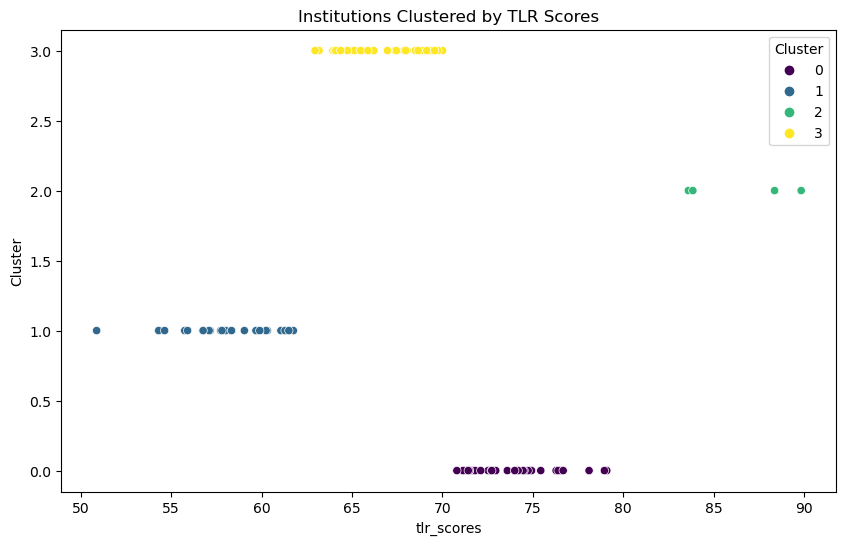

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tlr_scores', y='Cluster', data=tlr_data, hue='Cluster', palette='viridis')
plt.title('Institutions Clustered by TLR Scores')
plt.xlabel('tlr_scores')
plt.ylabel('Cluster')
plt.legend(title='Cluster')
plt.show()


In [35]:
# Find the top group (highest average TLR score)
top_group = tlr_data.groupby('Cluster')['tlr_scores'].mean().idxmax()

# List institutions in the top group
top_group_institutions = tlr_data[tlr_data['Cluster'] == top_group]
print("Institutions in the Top Group:")
print(top_group_institutions[['name', 'tlr_scores']])


Institutions in the Top Group:
                                     name  tlr_scores
0   Indian Institute of Technology Madras       88.37
1  Indian Institute of Science, Bengaluru       83.60
2   Indian Institute of Technology Bombay       83.85
4   Indian Institute of Technology Kanpur       89.84


In [36]:
top_group_institutions.to_csv('top_group_institutions.csv', index=False)


In [37]:
pip install numpy pandas matplotlib seaborn gspread oauth2client



     ---------------------------------------- 57.6/57.6 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 98.2/98.2 kB ? eta 0:00:00
     ---------------------------------------- 96.9/96.9 kB 5.4 MB/s eta 0:00:00


In [42]:
data = pd.read_excel('Data_amity_university.xlsx')  # Replace with your file path

data_2024 = pd.read_excel('Data_amity_university.xlsx', sheet_name='2024')  # Replace with your file path

# Display the data from the '2024' sheet
print(data_2024)

   Institute ID                                               Name  \
0   IR-O-U-0456              Indian Institute of Technology Madras   
1   IR-O-U-0220             Indian Institute of Science, Bengaluru   
2   IR-O-U-0306              Indian Institute of Technology Bombay   
3   IR-O-I-1074               Indian Institute of Technology Delhi   
4   IR-O-I-1075              Indian Institute of Technology Kanpur   
..          ...                                                ...   
95  IR-O-I-1486  Sri Ramachandra Institute of Higher Education ...   
96  IR-O-U-0003                       Acharya Nagarjuna University   
97  IR-O-U-0331                  Tata Institute of Social Sciences   
98  IR-O-U-0686      All India Institute of Medical Sciences Patna   
99  IR-O-U-0470                                 Periyar University   

             State  Score  Rank  TLR_Scores  RPC_Scores  GO_Scores  OI_Scores  \
0       Tamil Nadu  86.42     1       88.37       87.30      85.76      65.68 

In [44]:
# Group by and calculate mean, median
grouped_data = data_2024.groupby('Name').agg(
    TLR_Mean=('TLR_Scores', 'mean'),
    TLR_Median=('TLR_Scores', 'median')
).reset_index()

print(grouped_data)


                                                 Name  TLR_Mean  TLR_Median
0                        Acharya Nagarjuna University     64.38       64.38
1                                 Alagappa University     65.88       65.88
2                           Aligarh Muslim University     74.02       74.02
3       All India Institute of Medical Sciences Delhi     79.09       79.09
4     All India Institute of Medical Sciences Jodhpur     72.70       72.70
..                                                ...       ...         ...
95                                University of Jammu     72.95       72.95
96                              University of Kashmir     71.14       71.14
97                               University of Madras     69.31       69.31
98                    Vellore Institute of Technology     61.51       61.51
99  Visvesvaraya National Institute of Technology ...     62.96       62.96

[100 rows x 3 columns]


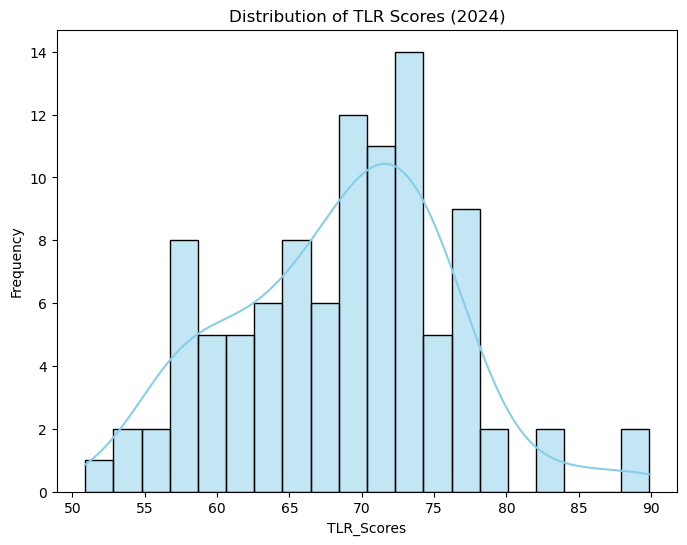

In [45]:
# TLR Scores Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data_2024['TLR_Scores'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of TLR Scores (2024)')
plt.xlabel('TLR_Scores')
plt.ylabel('Frequency')
plt.show()



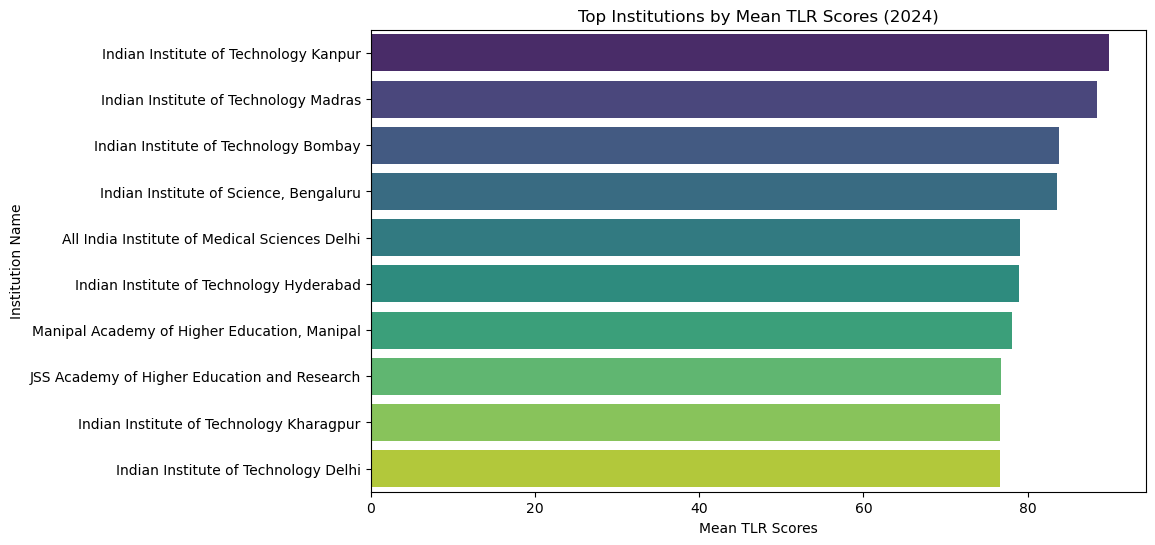

In [46]:
# Mean TLR Scores by Institution
plt.figure(figsize=(10, 6))
top_institutions = grouped_data.sort_values('TLR_Mean', ascending=False).head(10)
sns.barplot(data=top_institutions, x='TLR_Mean', y='Name', palette='viridis')
plt.title('Top Institutions by Mean TLR Scores (2024)')
plt.xlabel('Mean TLR Scores')
plt.ylabel('Institution Name')
plt.show()